# Búsqueda Aleatoria

El   Algoritmo   de   Búsqueda   Aleatoria   (BA)   consistirá   simplemente   en   generar aleatoriamente  una  solución  en  cada  iteración.  
La  búsqueda aleatoria  completa  debe  ejecutarse  10  veces,  cada  vez  con  una  semilla distinta  (por  tanto,  se  deben  anotar  las  10  semillas  que  se  utilizarán  sistemáticamente), para  el  generador  aleatorio,  y  para  cada  conjunto  de  datos con 1600·n llamadasa  la función de evaluación.

---
## Librerías
- matplotlib: necesaria para la representación de la solución.
- pandas: necesaria para la representación de resultados.
- random: necesaria para el control de números aleatorios.
- datetime: necesaria para la obtención de una semilla inicial que genere las demás semillas.
- multiprocessing: necesaria para la ejecución concurrente de las soluciones.
- itertools: necesaria para combinar las semillas con los dataset en la ejecución concurrente.
- ipynb: necesaria para cargar la función busqueda_aleatorio de otro fichero. Esto permite la ejecución concurrente en Jupyter.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from random import seed
from random import randint
from datetime import datetime
from multiprocessing import Pool, TimeoutError
import itertools
from ipynb.fs.full.algoritmo import busqueda_aleatoria

---
## Funciones auxiliares
- cargar_fichero(nombre_fichero): devuelve un array con las ciudades almacenadas en el fichero. [ [ ciudad, posición x , posición y ] [...] ... ]
- calcular_distancia_euclidea(node_1,node_2): devuelve en la distancia entre las dos ciudades.
- dibujar_flecha(A, B): dibuja una flecha entre el punto A y B apuntando a B. 
- representacion(camino, nombre, distancia): representa las ciudades y el camino calculado.
- representacion_datos(result,nombre): representa la solución obtenida de la ejecución concurrente de un dataset.
- agregar_resultados(dataframe,nombre,result): guarda los resultados de la ejecución en el dataframe según la plantilla del pdf.

In [2]:
def cargar_fichero(nombre_fichero):
    
    fichero = open( "../Dataset/" + nombre_fichero + ".tsp", 'r')
    
    for i in range(3):
        fichero.readline()
        
    numero_de_ciudades = fichero.readline().strip().split()[1]
    
    for i in range(2):
        fichero.readline()
        
    ciudades = []
    for i in range(0, int(numero_de_ciudades)):
        ciudad,x,y = fichero.readline().strip().split()[:]
        ciudades.append([int(ciudad),float(x),float(y)])  
        
    fichero.close()
    
    return ciudades

In [3]:
def calcular_distancia_euclidea(ciudad_1,ciudad_2):
    
    x1,y1 = ciudad_1[1 :]
    x2,y2 = ciudad_2[1 :]
    
    xd = x1 - x2
    yd = y1 - y2
    
    return round(math.sqrt( xd*xd + yd*yd ))

In [4]:
def dibujar_flecha(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=1.3, length_includes_head=True)

In [5]:
def representacion(camino, nombre, distancia):
    
    plt.figure(figsize=(10,10))
    
    for i in range(len(camino)):
        if(i == 0):
            plt.plot(camino[i][1], camino[i][2] , "o", color="green")
        else:
            plt.plot(camino[i][1], camino[i][2] , "*", color="red")
        
        if(i<len(camino)-1):
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[i+1][1], camino[i+1][2]])
        else:
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[0][1], camino[0][2]])
    
    plt.title(nombre + " : " + str(distancia))

In [6]:
def representacion_datos(result,nombre):
    semilla_coste = pd.DataFrame(columns=["Semilla","Coste","Nº de evaluaciones"])
    for i in range(10):
        semilla_coste.loc[len(semilla_coste)] = [semillas[i],result[i][1],1600*len(dataset)]
    display(semilla_coste)

    print("Media coste: ", semilla_coste[['Coste']].mean()[0])
    print("Desviación típica coste: ", semilla_coste[['Coste']].std()[0])
    print("Media nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].mean()[0])
    print("Desviación típica nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].std()[0])


    print()
    print("Representación de la mejor solución: ")
    indice = semilla_coste[['Coste']].idxmin()[0]


    representacion(result[indice][0], nombre, result[indice][1])

In [7]:
def agregar_resultados(dataframe,nombre,result):

    for i in range(10):
        dataframe.loc["Ejecución "+str(i+1),(nombre,"Coste")] = result[i][1]

    dataframe.loc["Media",(nombre,"Coste")] = resultados.loc[:"Ejecución 10",(nombre,"Coste")].mean()
    dataframe.loc["Des. Tip. (s)",(nombre,"Coste")] = resultados.loc[:"Ejecución 10",(nombre,"Coste")].std()

    for i in range(10):
        dataframe.loc["Ejecución "+str(i+1),(nombre,"#Ev")] = 1600*len(result[0][0])

    dataframe.loc["Media",(nombre,"#Ev")] = resultados.loc[:"Ejecución 10",(nombre,"#Ev")].mean()
    dataframe.loc["Des. Tip. (s)",(nombre,"#Ev")] = resultados.loc[:"Ejecución 10",(nombre,"#Ev")].std()

---
## Función de evaluación
Esta función genera el coste total de la solución pasara por parámetro. Para ello recorre todas las ciudades de la solución sumando el coste entre ellas. 

In [8]:
def funcion_de_evaluacion(solucion):
    coste = 0
    for indice in range(len(solucion)-1):
        coste += calcular_distancia_euclidea(solucion[indice],solucion[indice+1])
    coste += calcular_distancia_euclidea(solucion[-1],solucion[0])
    return coste

---
## Lectura de ficheros y ejecución del algoritmo
Para poder ejecutar correctamente el algoritmo de forma concurrente en Jupyter, este debe ser cargado de forma externa. Para ello se ha usado la librería ipynb.

In [9]:
st70 = cargar_fichero("st70")
ch130 = cargar_fichero("ch130")
a280 = cargar_fichero("a280")
p654 = cargar_fichero("p654")
vm1084 = cargar_fichero("vm1084")
vm1748 = cargar_fichero("vm1748")

### Generación de semillas

In [10]:
semillas = []
dt = datetime.now()
for i in range(10):
    semillas.append(randint(0,dt.microsecond))
print("Semillas generadas:")
print(semillas)

Semillas generadas:
[83050, 307721, 11265, 134042, 209747, 170592, 65356, 103706, 159057, 102363]


## Dataframe para ver los resultados

In [11]:
mux = pd.MultiIndex.from_product([["St70","Ch130","A280","Pa654","Vm1084","Vm1748"], ['Coste','#Ev']])
resultados = pd.DataFrame(
    columns=mux,
    index = ['Ejecución 1', 'Ejecución 2', 'Ejecución 3',"Ejecución 4","Ejecución 5","Ejecución 6","Ejecución 7","Ejecución 8","Ejecución 9","Ejecución 10","Media","Des. Tip. (s)"]
)

### st70

,Semilla,Coste,Nº de evaluaciones
0,83050.0,2899.0,112000.0
1,307721.0,2780.0,112000.0
2,11265.0,2837.0,112000.0
3,134042.0,2870.0,112000.0
4,209747.0,2836.0,112000.0
5,170592.0,2845.0,112000.0
6,65356.0,2838.0,112000.0
7,103706.0,2834.0,112000.0
8,159057.0,2810.0,112000.0
9,102363.0,2775.0,112000.0


Media coste:  2832.4
Desviación típica coste:  37.44388393909537
Media nº de evaluaciones:  112000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


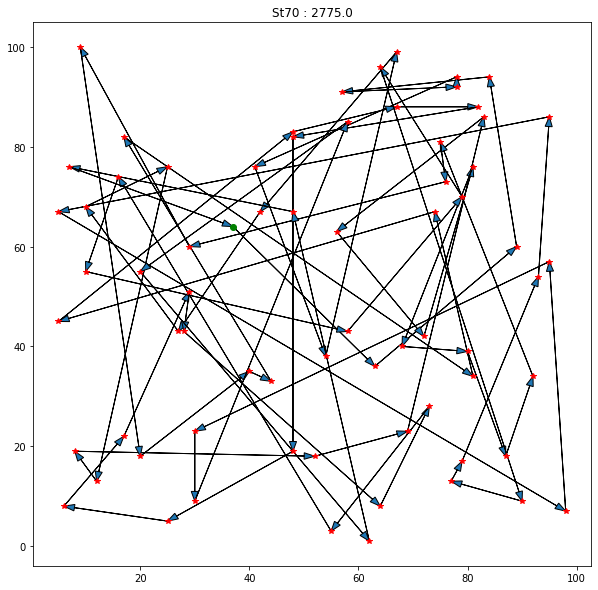

In [12]:
dataset = st70

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"St70")

agregar_resultados(resultados,"St70",result)

### ch130


,Semilla,Coste,Nº de evaluaciones
0,83050.0,38446.0,208000.0
1,307721.0,38830.0,208000.0
2,11265.0,39013.0,208000.0
3,134042.0,38251.0,208000.0
4,209747.0,38654.0,208000.0
5,170592.0,39077.0,208000.0
6,65356.0,39229.0,208000.0
7,103706.0,38961.0,208000.0
8,159057.0,38041.0,208000.0
9,102363.0,38800.0,208000.0


Media coste:  38730.2
Desviación típica coste:  381.27761830747716
Media nº de evaluaciones:  208000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


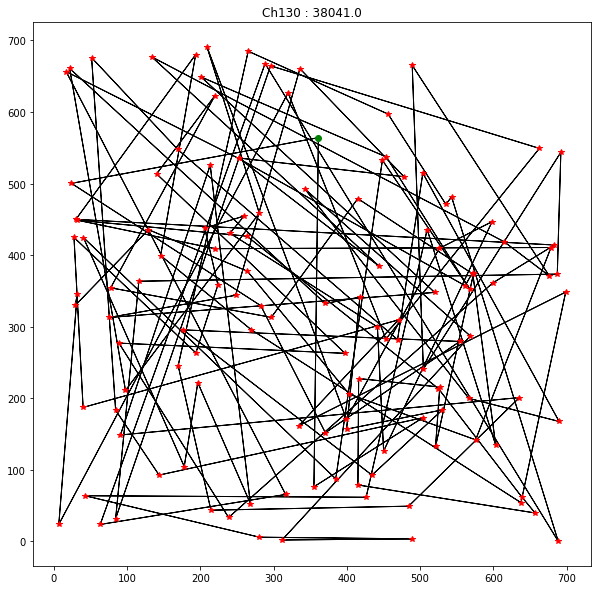

In [13]:
dataset = ch130

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"Ch130")

agregar_resultados(resultados,"Ch130",result)

### a280

,Semilla,Coste,Nº de evaluaciones
0,83050.0,29732.0,448000.0
1,307721.0,29790.0,448000.0
2,11265.0,29428.0,448000.0
3,134042.0,29076.0,448000.0
4,209747.0,29754.0,448000.0
5,170592.0,29636.0,448000.0
6,65356.0,30064.0,448000.0
7,103706.0,29796.0,448000.0
8,159057.0,29131.0,448000.0
9,102363.0,28762.0,448000.0


Media coste:  29516.9
Desviación típica coste:  406.8246824151925
Media nº de evaluaciones:  448000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


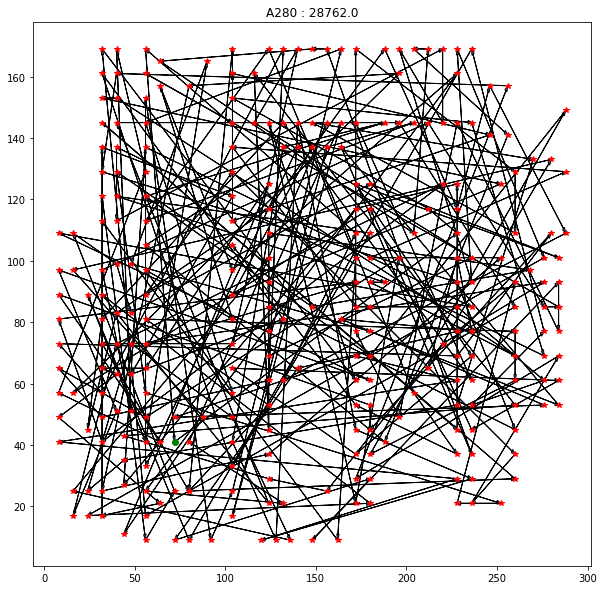

In [14]:
dataset = a280

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"A280")

agregar_resultados(resultados,"A280",result)

### p654

,Semilla,Coste,Nº de evaluaciones
0,83050.0,1789857.0,1046400.0
1,307721.0,1814094.0,1046400.0
2,11265.0,1797975.0,1046400.0
3,134042.0,1819499.0,1046400.0
4,209747.0,1798806.0,1046400.0
5,170592.0,1808572.0,1046400.0
6,65356.0,1807236.0,1046400.0
7,103706.0,1811747.0,1046400.0
8,159057.0,1783474.0,1046400.0
9,102363.0,1812432.0,1046400.0


Media coste:  1804369.2
Desviación típica coste:  11488.417595319403
Media nº de evaluaciones:  1046400.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


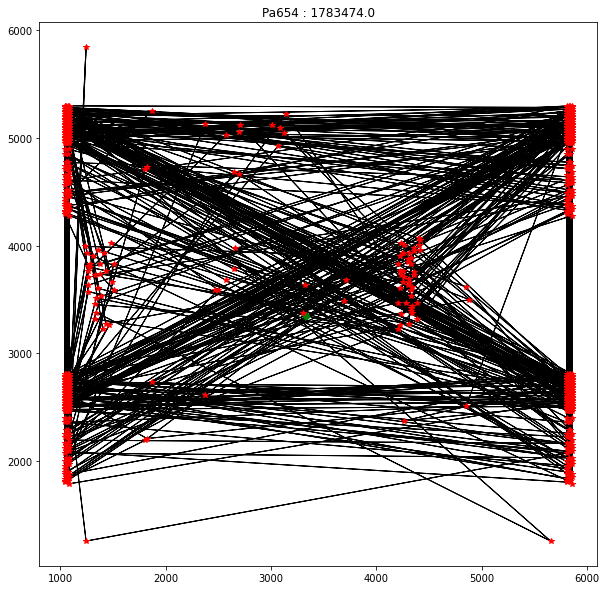

In [15]:
dataset = p654

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"Pa654")

agregar_resultados(resultados,"Pa654",result)

### vm1084

,Semilla,Coste,Nº de evaluaciones
0,83050.0,7993816.0,1734400.0
1,307721.0,7944549.0,1734400.0
2,11265.0,7994081.0,1734400.0
3,134042.0,7963697.0,1734400.0
4,209747.0,7977197.0,1734400.0
5,170592.0,7950698.0,1734400.0
6,65356.0,7996856.0,1734400.0
7,103706.0,7959511.0,1734400.0
8,159057.0,8005380.0,1734400.0
9,102363.0,7960300.0,1734400.0


Media coste:  7974608.5
Desviación típica coste:  21663.223250733285
Media nº de evaluaciones:  1734400.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


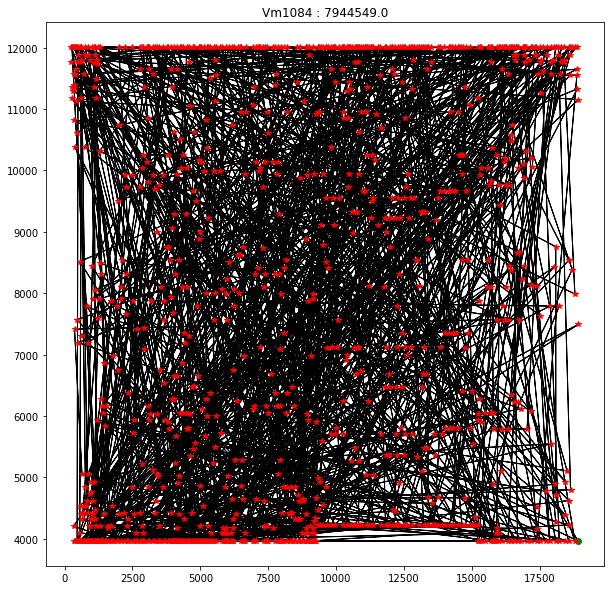

In [16]:
dataset = vm1084

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"Vm1084")

agregar_resultados(resultados,"Vm1084",result)

### vm1748

,Semilla,Coste,Nº de evaluaciones
0,83050.0,14122987.0,2796800.0
1,307721.0,14116575.0,2796800.0
2,11265.0,14138041.0,2796800.0
3,134042.0,14143659.0,2796800.0
4,209747.0,14169420.0,2796800.0
5,170592.0,14176894.0,2796800.0
6,65356.0,14120624.0,2796800.0
7,103706.0,14069521.0,2796800.0
8,159057.0,14112588.0,2796800.0
9,102363.0,14080484.0,2796800.0


Media coste:  14125079.3
Desviación típica coste:  34143.68385400471
Media nº de evaluaciones:  2796800.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


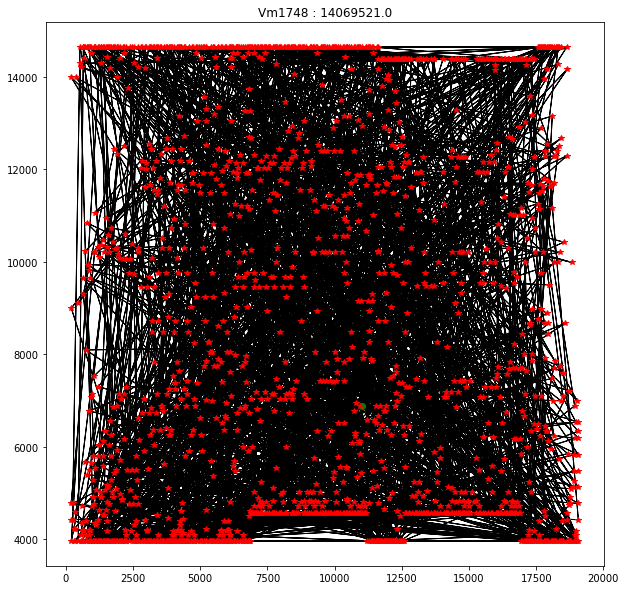

In [17]:
dataset = vm1748

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"Vm1748")

agregar_resultados(resultados,"Vm1748",result)

---
# Resultados

In [18]:
resultados

St70                 Ch130                  A280  \
                   Coste       #Ev       Coste       #Ev       Coste   
Ejecución 1       2899.0    112000     38446.0    208000     29732.0   
Ejecución 2       2780.0    112000     38830.0    208000     29790.0   
Ejecución 3       2837.0    112000     39013.0    208000     29428.0   
Ejecución 4       2870.0    112000     38251.0    208000     29076.0   
Ejecución 5       2836.0    112000     38654.0    208000     29754.0   
Ejecución 6       2845.0    112000     39077.0    208000     29636.0   
Ejecución 7       2838.0    112000     39229.0    208000     30064.0   
Ejecución 8       2834.0    112000     38961.0    208000     29796.0   
Ejecución 9       2810.0    112000     38041.0    208000     29131.0   
Ejecución 10      2775.0    112000     38800.0    208000     28762.0   
Media             2832.4  112000.0     38730.2  208000.0     29516.9   
Des. Tip. (s)  37.443884       0.0  381.277618       0.0  406.824682   

                                Pa654                   Vm1084             \
                    #Ev         Coste        #Ev         Coste        #Ev   
Ejecución 1      448000     1789857.0    1046400     7993816.0    1734400   
Ejecución 2      448000     1814094.0    1046400     7944549.0    1734400   
Ejecución 3      448000     1797975.0    1046400     7994081.0    1734400   
Ejecución 4      448000     1819499.0    1046400     7963697.0    1734400   
Ejecución 5      448000     1798806.0    1046400     7977197.0    1734400   
Ejecución 6      448000     1808572.0    1046400     7950698.0    1734400   
Ejecución 7      448000     1807236.0    1046400     7996856.0    1734400   
Ejecución 8      448000     1811747.0    1046400     7959511.0    1734400   
Ejecución 9      448000     1783474.0    1046400     8005380.0    1734400   
Ejecución 10     448000     1812432.0    1046400     7960300.0    1734400   
Media          448000.0     1804369.2  1046400.0     7974608.5  1734400.0   
Des. Tip. (s)       0.0  11488.417595        0.0  21663.223251        0.0   

                     Vm1748             
                      Coste        #Ev  
Ejecución 1      14122987.0    2796800  
Ejecución 2      14116575.0    2796800  
Ejecución 3      14138041.0    2796800  
Ejecución 4      14143659.0    2796800  
Ejecución 5      14169420.0    2796800  
Ejecución 6      14176894.0    2796800  
Ejecución 7      14120624.0    2796800  
Ejecución 8      14069521.0    2796800  
Ejecución 9      14112588.0    2796800  
Ejecución 10     14080484.0    2796800  
Media            14125079.3  2796800.0  
Des. Tip. (s)  34143.683854        0.0

In [19]:
resultados.to_csv(r'./Resultados.csv')